# Importing libraries & setting common values

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.lines import Line2D

plt.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('legend', facecolor='white', edgecolor='k', framealpha=1)
plt.rcParams['xtick.major.size'] = 3.5
plt.rcParams['ytick.major.size'] = 3.5
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def custom_save_fig(fig, fname):
    for ftype in ['.png', '.pdf']:
        fig.savefig('./output/plots/'+ fname + ftype, facecolor=(1,1,1,0), dpi=300, transparent=True)
# plt.rcParams.keys()

# psuedo-$C_l$ for fake maps

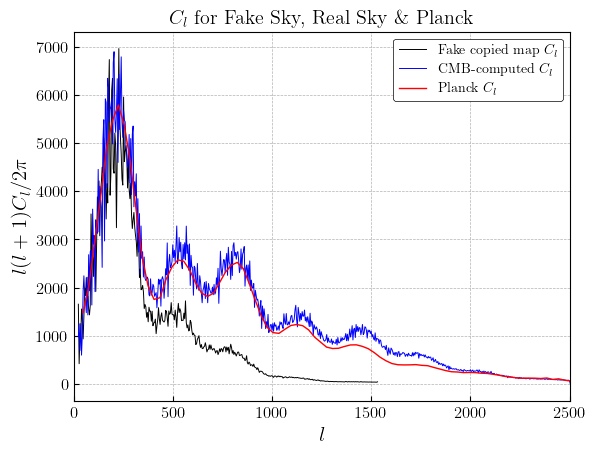

In [15]:

ell_cl          = np.loadtxt('./output/copied_psuedo_cl.txt')
r_ell_cl        = np.loadtxt('./output/psuedo_cl.txt') # real map
planck_ell_dl   = np.loadtxt('./output/planck_powerspec.txt') # planck map

with plt.style.context('bmh'):
    fig, ax = plt.subplots()
    first_l = 5

    ell     = ell_cl[first_l:, 0]
    r_ell   = r_ell_cl[first_l:, 0]

    Cl      = ell_cl[first_l:, 1]
    r_Cl    = r_ell_cl[first_l:, 1]

    fake_Dl      = ell * (ell + 1) * Cl / 2 / np.pi
    cmb_Dl    = r_ell * (r_ell + 1) * r_Cl / 2 / np.pi
    # ax.set_xscale('log')
    ax.set_xlabel(r'$l$',size=15)
    ax.set_ylabel(r'$l (l+1) C_l / 2 \pi$',size=15)
    ax.plot(ell, fake_Dl, '-k', linewidth=0.7)
    ax.plot(r_ell, cmb_Dl, '-b', linewidth=0.7)
    ax.plot(planck_ell_dl[:,0], planck_ell_dl[:,1], '-r', linewidth=1)
    ax.set_xlim(0, 2500)
    ax.set_title(r'$C_l$ {for Fake Sky, Real Sky \& Planck}')
    # ax.grid(False)
    ax.set_facecolor('white')
    ax.legend([r'Fake copied map $C_l$', r'CMB-computed $C_l$', r'Planck $C_l$'])
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
plt.show()

# Simulations' $a_l$

## Simulations' modulated $a_l$

0.06908247547397897
0.04913806173862389


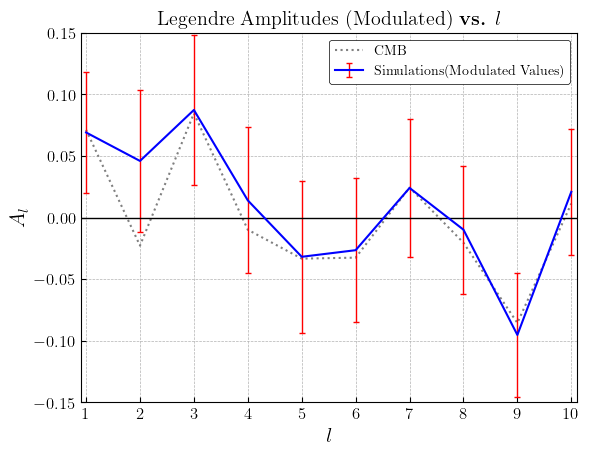

In [66]:
cmb_a_l             = np.loadtxt('./output/cmb_a_l.txt')
sims_modulated_a_l  = np.loadtxt('./output/sims_modulated_a_l.txt')
max_l               = len(cmb_a_l) - 1

avg_sims_result = np.mean(sims_modulated_a_l, axis=0)
std_sims_result = np.std(sims_modulated_a_l, axis=0)
l_coeff         = np.arange(max_l + 1)

with plt.style.context('bmh'):
    fig, ax  = plt.subplots()

    grey_col = (0.5,0.5,0.5,1)
    # cmb 
    ax.plot(l_coeff[1:], avg_sims_result[1:],
            linewidth=1.5, linestyle=':', color=grey_col,
            label='CMB')

    # simulation values with errorbars
    ax.errorbar(l_coeff[1:], cmb_a_l[1:], std_sims_result[1:],
                color='blue', linewidth=1.5, label='Simulations(Modulated Values)',
                linestyle='-', ecolor='red', elinewidth=1, capsize = 2)
    
    margin = 0.1
    ax.hlines([0], xmin = 1 - margin, xmax = max_l + margin, color='k', linestyle='-', linewidth=1)
    ax.set_xlim((1 - margin, max_l + margin))
    ax.set_ylim((-0.15, 0.15))
    ax.set_xticks(np.arange(1, max_l + 1, step=1))
    ax.set_xlabel(r'$l$', size=15)
    ax.set_ylabel(r'$A_l$', size=15)
    ax.set_title(r'Legendre Amplitudes (Modulated) \textbf{vs.} $l$')
    ax.legend()
    # ax.yaxis.grid(False)
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    ax.set_facecolor('white')
    custom_save_fig(fig, '64_inpainted_a_l_sims_modulated')
print(cmb_a_l[1])
print(std_sims_result[1])
plt.show()

## Simulations' internal $a_l$

### All sims

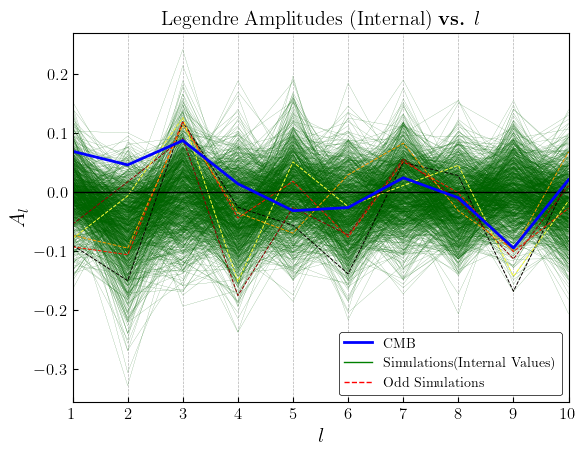

In [67]:
cmb_a_l             = np.loadtxt('./output/cmb_a_l.txt')
sims_internal_a_l   = np.loadtxt('./output/sims_internal_a_l.txt')
max_l               = len(cmb_a_l) - 1

avg_sims_result = np.mean(sims_internal_a_l, axis=0)[1:]
std_sims_result = np.std(sims_internal_a_l, axis=0)[1:]
l_coeff         = np.arange(max_l + 1)

# All plot -------------------------------------------
with plt.style.context('bmh'):
    fig, ax     = plt.subplots()

    # cmb
    ax.plot(l_coeff[1:], cmb_a_l[1:], '-b', linewidth=1)
    
    # simulation values with modulation applied
    for i in range(len(sims_internal_a_l)):
        ax.plot(l_coeff[1:], sims_internal_a_l[i][1:],
                linestyle='-', linewidth = .1, color='darkgreen')

    # custom colormap to visualize 1000 curves
    # some useful colormaps: 
    #       jet - magma - hot - winter - spring - summer - 
    #       cool - twilight - gist_earth - coolwarm - spectral - 
    _col_map = plt.get_cmap('hot') 
    col_norm  = colors.Normalize(vmin=0, vmax=1)
    scalar_cmap = cmx.ScalarMappable(norm=col_norm, cmap=_col_map)

    # l = 3 and l = 9 are nonzero! Who is more odd in these l's
    _filter = (cmb_a_l[3] < sims_internal_a_l[:, 3]) * (cmb_a_l[9] > sims_internal_a_l[:, 9])
    odd_indices = np.arange(len(_filter))[_filter]
    for i, index in enumerate(odd_indices):
        ax.plot(l_coeff[1:], sims_internal_a_l[index][1:],
                '--', linewidth = .7,
                color = scalar_cmap.to_rgba(i/len(odd_indices))
                )

    ax.hlines([0], xmin = 1 - margin, xmax = max_l + margin, color='k', linestyle='-', linewidth=1)
    ax.plot(l_coeff[1:], cmb_a_l[1:], '-b', linewidth=2)

    margin = 0.05
    ax.set_xlabel(r'$l$', size=15)
    ax.set_ylabel(r'$A_l$', size=15)
    ax.set_xlim((1, max_l))
    ax.set_title(r'Legendre Amplitudes (Internal) \textbf{vs.} $l$')
    ax.set_xticks(np.arange(1, max_l + 1, step=1))
    ax.yaxis.grid(False)

    # Custom legends 
    sample_curves = [
        Line2D([0], [0], ls='-',color='b', lw=2),
        Line2D([0], [0], ls='-', color='g', lw=1),
        Line2D([0], [0], ls='--', color='r', lw=1)
        ]
    ax.legend(sample_curves, [r'CMB', r'Simulations(Internal Values)', r'Odd Simulations'])
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    ax.set_facecolor('white')
    custom_save_fig(fig, 'a_l_sims_internal_all')
plt.show()

### Average of sims

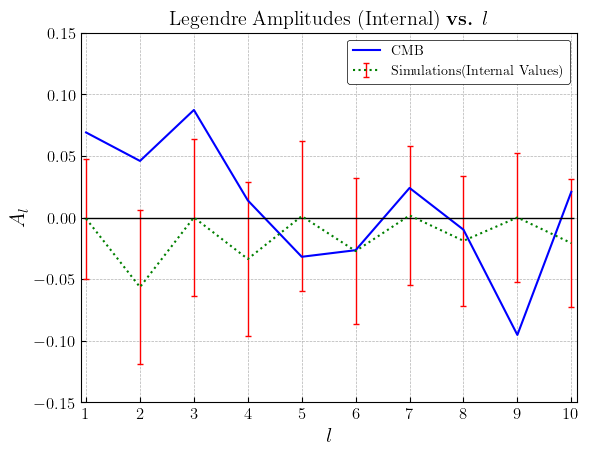

In [68]:
# Average plot -------------------------------------------

cmb_a_l                 = np.loadtxt('./output/cmb_a_l.txt')
sims_internal_a_l       = np.loadtxt('./output/sims_internal_a_l.txt')
max_l                   = len(cmb_a_l) - 1

avg_sims_result = np.mean(sims_internal_a_l, axis=0)
std_sims_result = np.std(sims_internal_a_l, axis=0)
l_coeff         = np.arange(max_l + 1)

with plt.style.context('bmh'):
    fig, ax     = plt.subplots()

    grey_col = (0.5,0.5,0.5,1)
    # simulation with errorbars
    ax.errorbar(l_coeff[1:], avg_sims_result[1:], std_sims_result[1:],
                color='g', linestyle=':',linewidth=1.5, label='Simulations(Internal Values)',
                ecolor='red', elinewidth=1, capsize = 2)
    
    # cmb
    ax.plot(l_coeff[1:], cmb_a_l[1:],
            linewidth=1.5, linestyle='-', color='b',
            label='CMB')
    
    ax.hlines([0], xmin = 1 - margin, xmax = max_l + margin, color='k', linestyle='-', linewidth=1)

    ax.set_xticks(np.arange(1, max_l + 1, step=1))
    ax.set_xlabel(r'$l$', size=15)
    ax.set_ylabel(r'$A_l$', size=15)
    ax.set_xlim((1, max_l))
    ax.set_title(r'Legendre Amplitudes (Internal) \textbf{vs.} $l$')
    margin = 0.1
    ax.set_xlim((1 - margin, max_l + margin))
    ax.set_ylim((-0.15, 0.15))
    ax.set_xticks(np.arange(1, max_l + 1, step=1))
    # ax.yaxis.grid(False)

    ax.legend()
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    ax.set_facecolor('white')
    custom_save_fig(fig, '64_inpainted_a_l_sims_internal')
plt.show()

# p-value of $a_l$
### Dot product of CMB strips and Simulations

0.07947816435770289
p-value = 0.001


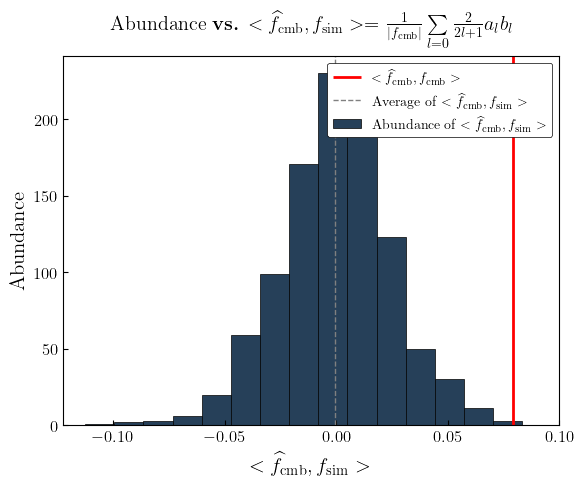

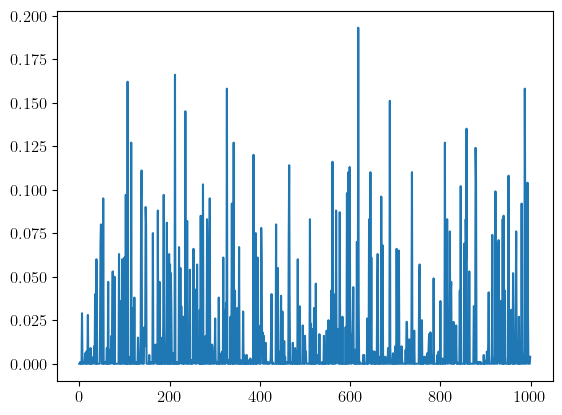

In [7]:
cmb_a_l             = np.loadtxt('./output/cmb_a_l.txt')
sims_internal_a_l   = np.loadtxt('./output/sims_internal_a_l.txt')
max_l               = len(cmb_a_l) - 1


def legendre_dot(f_a_l, g_a_l, l_start):
    max_l = len(f_a_l)
    # range(l_start, max_l)
    components = np.array([ (2 / (2*l + 1)) * f_a_l[l] * g_a_l[l] for l in (1,3,9)])
    return np.sum(components)

nsims = len(sims_internal_a_l)
cmb_length = np.sqrt(legendre_dot(cmb_a_l, cmb_a_l, 1))
dots = np.array([legendre_dot(cmb_a_l, sims_internal_a_l[i], 1) / cmb_length for i in range(nsims)])
print(cmb_length)
print("p-value = {}".format(np.sum(dots > cmb_length) / nsims))

with plt.style.context('bmh'):
    fig, ax = plt.subplots()
    ax.hist(dots, bins = 15,
            color=(0.15,0.25,0.35), edgecolor='black');
    _ymin, _ymax = ax.get_ylim()
    ax.set_ylim((_ymin, _ymax)) # since plt changes limits after adding vlines
    # cmb vline
    ax.vlines([cmb_length], ymin = _ymin, ymax = _ymax,
              colors=['r'],
              linewidths=[2],
              linestyles=["-"])
    # mean vline
    ax.vlines([dots.mean()], ymin = _ymin, ymax = _ymax,
              colors=['grey'],
              linewidths=[1],
              linestyles=["--"])
    ax.legend([
                    r'$<\widehat{f}_{\mathrm{cmb}},f_{\mathrm{cmb}}>$',
                    r'Average of $<\widehat{f}_{\mathrm{cmb}},f_{\mathrm{sim}}>$',
                    r'Abundance of $<\widehat{f}_{\mathrm{cmb}},f_{\mathrm{sim}}>$',
               ],
              facecolor='white',
              loc=1,
              framealpha=1,
              edgecolor='k')
    ax.set_xlabel(r'$<\widehat{f}_{\mathrm{cmb}}, f_{\mathrm{sim}}>$', size=15)
    ax.set_ylabel(r'Abundance', size=15)
    ax.set_xticks(np.linspace(-0.1, 0.1, 5))
    ax.set_title(r'Abundance \textbf{vs.} $<\widehat{f}_{\mathrm{cmb}}, f_{\mathrm{sim}}> = '
                 r'\frac{{1}}{{|f_{\mathrm{cmb}}|}} \sum\limits_{l=0} \frac{{2}}{{2l + 1}} a_l b_l$',
                 y = 1.05)
    ax.set_facecolor('white')
    ax.grid(False)
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, 'abundance of inner products')
plt.show()


all_pvalues = np.zeros(nsims)
for j in range(nsims):
    dots = np.array([legendre_dot(sims_internal_a_l[j], sims_internal_a_l[i], 1) / cmb_length for i in range(nsims)])
    length = np.sqrt(legendre_dot(cmb_a_l, cmb_a_l, 1))
    all_pvalues[j] = np.sum(dots > cmb_length) / nsims

plt.plot(np.arange(nsims), all_pvalues)
plt.show()



### Regernerating sigma of strips using $a_l$'s

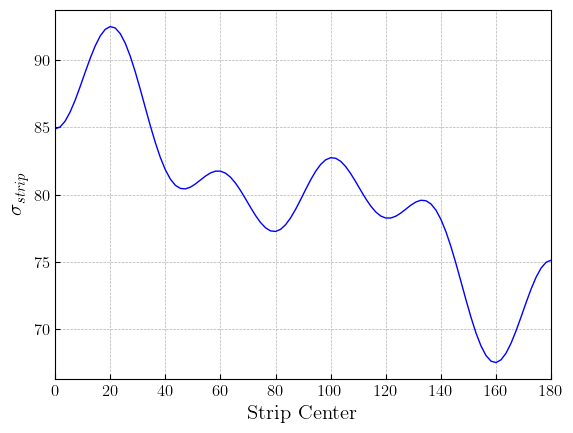

In [362]:
# which ones show
# _filter = (cmb_a_l[1] < sims_a_l[:, 1])
# _filter = (cmb_a_l[3] < sims_a_l[:, 3])
# _filter = (cmb_a_l[9] > sims_a_l[:, 9])
# _filter = (cmb_a_l[3] < sims_a_l[:, 3]) * (cmb_a_l[9] > sims_a_l[:, 9])
# # print("count: ", np.sum(_filter))
# # print("p-value: ", np.sum(_filter) / len(sims_a_l))
with plt.style.context('bmh'):
    fig, ax = plt.subplots()
    x = np.linspace(0, np.pi, 100)
    xcos = np.cos(x)
    y = np.sum(np.array([cmb_a_l[l] * np.polynomial.Legendre.basis(l)(xcos) for l in [1, 3, 9]]), axis = 0)
    ax.plot(x * 180 / np.pi, y, color='b', linewidth=1, linestyle='-')
    # To be corrected
    # ax.plot(x * 180 / np.pi, monopole * (1 + y), color='b', linewidth=1, linestyle='-')
    ax.set_xticks(np.arange(0, 190, step=20));
    ax.set_xlim((0, 180));
    ax.set_xlabel(r'Strip Center',size=15)
    ax.set_ylabel(r'$\sigma_{strip}$',size=15)
    ax.set_title(r'')
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    
plt.show()

# step function test

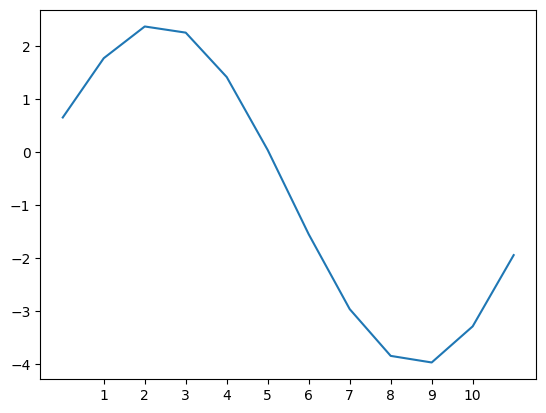

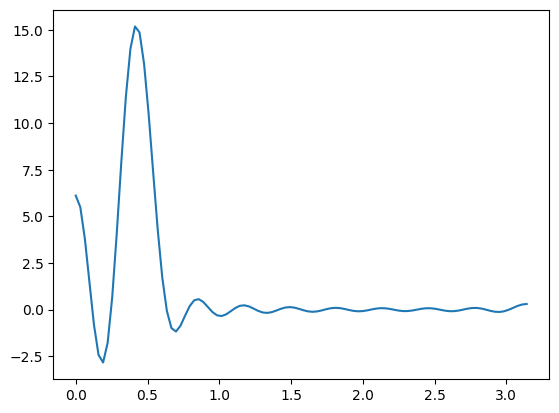

In [120]:
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt


a_l = np.loadtxt('./output/step_a_l.txt')
plt.plot(np.arange(12), a_l[:12])
plt.xticks(np.arange(1, max_l + 1, step=1))
plt.show()

x = np.linspace(0, np.pi, 100)

y = np.sum(np.array([a_l[i] * np.polynomial.Legendre.basis(i)(np.cos(x)) for i in range(0,20)]), axis=0)

plt.plot(x, y)
plt.show()


# Strip

#### STD

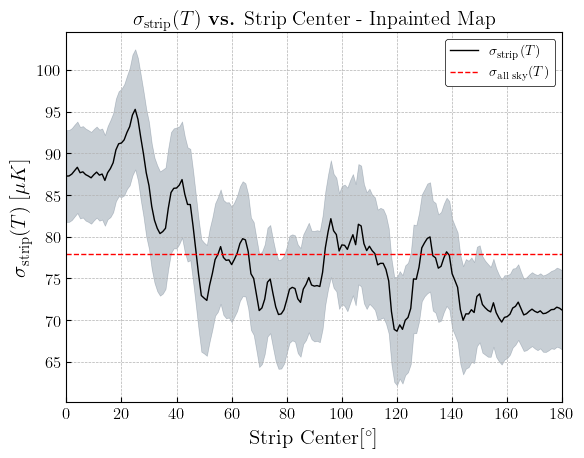

In [81]:
sims_mod_measure    = np.loadtxt('./output/sims_modulated_strip_std.txt')
cmb_measure         = np.loadtxt('./output/T_64_inpainted_20strip_std_result.txt')
cmb_cap_measure     = np.loadtxt('./output/T_64_inpainted_cap_std_result.txt')
sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_std_measure_range.txt')

_errors = np.std(sims_mod_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # ax.fill_between(sampling_range, np.min(sims_mod_measure, axis=0), np.max(sims_mod_measure, axis=0) + _errors, color=(0.15,0.25,0.35,0.25))
    ax.fill_between(sampling_range, cmb_measure - _errors, cmb_measure + _errors,
                    color=(0.15,0.25,0.35,0.25), label='_nolegend_')
    ax.plot(sampling_range, cmb_measure, color='k', linewidth=1)
    ax.hlines([cmb_cap_measure[-1]], 0, 180, colors=['r'], linestyles=['--'], linewidths=[1])
    # ax.plot(sampling_range, np.mean(sims_mod_measure,axis=0), color='b',linestyle='--')
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{strip}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(measure_text + r' \textbf{vs.} Strip Center - Inpainted Map')
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.legend([r'$\sigma_{\mathrm{strip}}(T)$', r'$\sigma_{\mathrm{all \; sky}}(T)$'])
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_std_20strip')
plt.show()

#### STD Legendre fitting

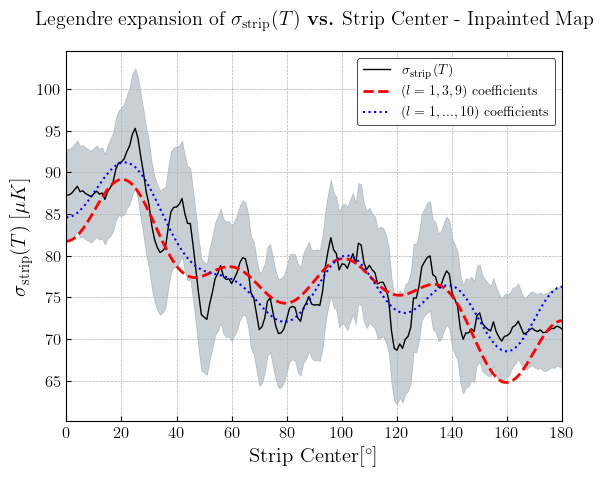

In [84]:
sims_mod_measure    = np.loadtxt('./output/sims_modulated_strip_std.txt')
cmb_measure         = np.loadtxt('./output/T_64_inpainted_20strip_std_result.txt')
sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_std_measure_range.txt')
cmb_a_l             = np.loadtxt('./output/cmb_a_l.txt')

_errors = np.std(sims_mod_measure, axis=0)

monopole = np.mean(cmb_measure)

theta           = sampling_range * np.pi / 180
al_pl_all       = np.array([cmb_a_l[l] * np.polynomial.Legendre.basis(l)(np.cos(theta)) for l in range(len(cmb_a_l))])
al_pl_nonzero   = np.array([cmb_a_l[l] * np.polynomial.Legendre.basis(l)(np.cos(theta)) for l in (0,1,3,9)])

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # one sigma band 
    ax.fill_between(sampling_range, cmb_measure - _errors, cmb_measure + _errors,
                    color=(0.15,0.25,0.35,0.25), label='_nolegend_')
    # cmb std
    ax.plot(sampling_range, cmb_measure,
            color='k', linewidth=1)
    # cmb legendre nonzero a_l
    ax.plot(sampling_range, monopole * np.sum(al_pl_nonzero, axis=0),
            color='r',linestyle='--', lw=2)
    # cmb legendre all a_l
    ax.plot(sampling_range, monopole * np.sum(al_pl_all, axis=0),
            linewidth=1.5, color='b',linestyle=':')
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{strip}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'Legendre expansion of '+ measure_text + r' \textbf{vs.} Strip Center - Inpainted Map',
                 y=1.05)
    ax.legend([measure_text,
               r'($l=1, 3, 9$) coefficients',
               r'($l=1, ..., 10$) coefficients'])
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_std_20strip_legendre')
plt.show()

#### DSTD2

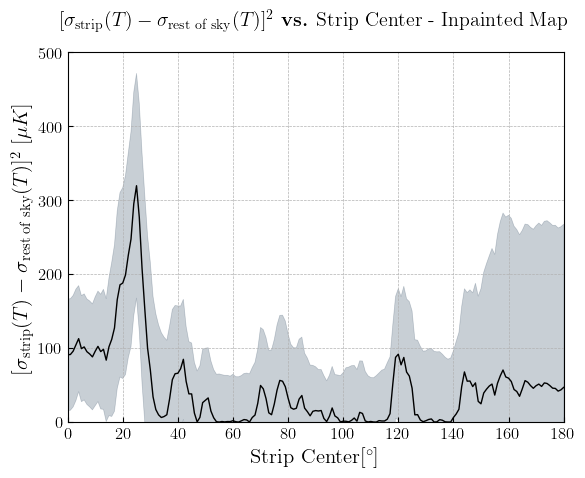

In [72]:
sims_mod_measure    = np.loadtxt('./output/sims_modulated_strip_dstd2.txt')
cmb_measure         = np.loadtxt('./output/T_64_inpainted_20strip_dstd2_result.txt')
sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_dstd2_measure_range.txt')

_errors = np.std(sims_mod_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.fill_between(sampling_range, cmb_measure - _errors, cmb_measure + _errors,
                    color=(0.15,0.25,0.35,0.25), label='_nolegend_')
    ax.plot(sampling_range, cmb_measure,
            color='k', linewidth=1)
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$[\sigma_{\mathrm{strip}}(T) - \sigma_{\mathrm{rest\;of\;sky}}(T)]^2$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(measure_text + r' \textbf{vs.} Strip Center - Inpainted Map',
                 y=1.05)
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymin = 0, ymax = 500)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_dstd2_20strip')
plt.show()

#### Corr

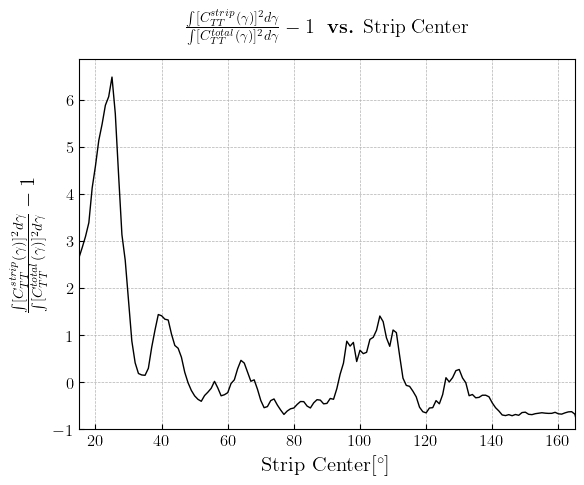

In [73]:
cmb_measure         = np.loadtxt('./output/T_64_inpainted_20strip_corr_result.txt')
sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_corr_measure_range.txt')

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.plot(sampling_range, cmb_measure, color='k', linewidth=1)
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\frac {{ \int [C_{TT}^{{strip}}(\gamma)]^2 d\gamma }} {{ \int [C_{TT}^{{total}}(\gamma)]^2 d\gamma }} - 1$'
    ax.set_ylabel(measure_text,size=15)
    ax.set_title(measure_text + r'\; \textbf{vs.} Strip Center',
                 y = 1.05)
    ax.set_xlim(xmin = 15, xmax = 165)
    ax.set_ylim(ymin = -1)
    ax.set_facecolor('white')
    # ax.grid(False)
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_corr_20strip')
plt.show()

#### DCORR2

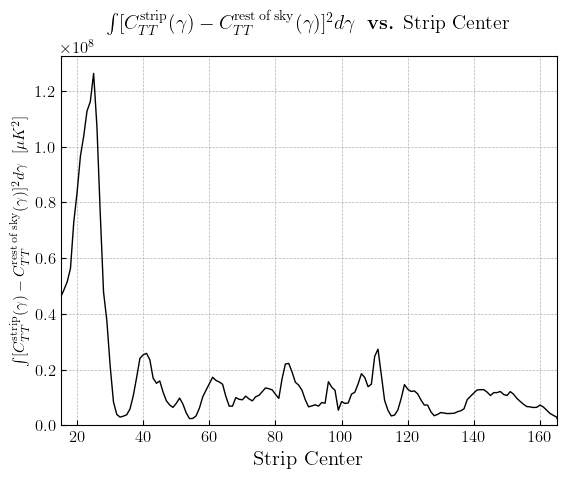

In [74]:
cmb_measure         = np.loadtxt('./output/T_64_inpainted_20strip_dcorr2_result.txt')
sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_dcorr2_measure_range.txt')

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.plot(sampling_range, cmb_measure, color='k', linewidth=1)
    ax.set_xlabel(r'Strip Center',size=15)
    measure_text = r'$\int [C_{TT}^{{\mathrm{strip}}}(\gamma) - C_{TT}^{{\mathrm{rest\,of\,sky}}}(\gamma)]^2 d\gamma$'
    ax.set_ylabel(measure_text + r'\; $[\mu K^2]$',size=11)
    ax.set_title(measure_text + r'\; \textbf{vs.} Strip Center',
                 y = 1.05)
    ax.set_xlim(xmin = 15, xmax = 165)
    ax.set_ylim(ymin = 0)
    ax.set_facecolor('white')
    # ax.grid(False)
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_dcorr2_20strip')
plt.show()

# Cap

#### STD

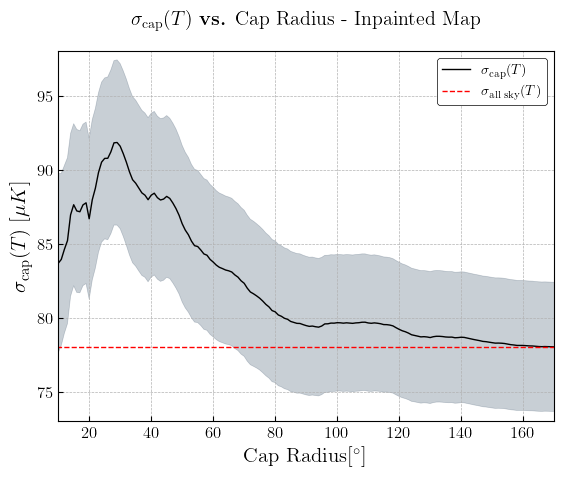

In [75]:
sims_mod_measure    = np.loadtxt('./output/sims_modulated_cap_std.txt')
cmb_measure         = np.loadtxt('./output/T_64_inpainted_cap_std_result.txt')
sampling_range      = np.loadtxt('./output/T_64_inpainted_cap_std_measure_range.txt')

_errors = np.std(sims_mod_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.fill_between(sampling_range, cmb_measure - _errors, cmb_measure + _errors,
                    color=(0.15,0.25,0.35,0.25), label='_nolegend_')
    ax.plot(sampling_range, cmb_measure,
            color='k', linewidth=1)
    ax.hlines([cmb_measure[-1]], 0, 180, colors=['r'], linestyles=['--'], linewidths=[1])
    ax.set_xlabel(r'Cap Radius[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{cap}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(measure_text + r' \textbf{vs.} Cap Radius - Inpainted Map',
                 y=1.05)
    ax.set_xlim(xmin = 10, xmax = 170)
    ax.set_ylim(ymin = 73, ymax = 98)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    ax.legend([r'$\sigma_{\mathrm{cap}}(T)$', r'$\sigma_{\mathrm{all \; sky}}(T)$'])
    custom_save_fig(fig, '64_inpainted_std_cap')
plt.show()

#### DSTD2

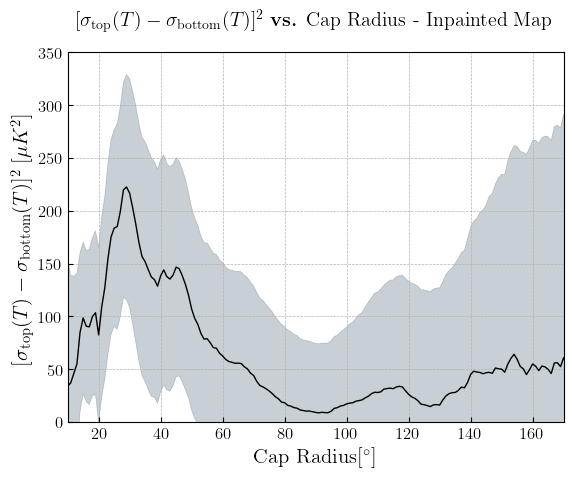

In [76]:
sims_mod_measure    = np.loadtxt('./output/sims_modulated_cap_dstd2.txt')
cmb_measure         = np.loadtxt('./output/T_64_inpainted_cap_dstd2_result.txt')
sampling_range      = np.loadtxt('./output/T_64_inpainted_cap_dstd2_measure_range.txt')

_errors = np.std(sims_mod_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.fill_between(sampling_range, cmb_measure - _errors, cmb_measure + _errors,
                    color=(0.15,0.25,0.35,0.25), label='_nolegend_')
    ax.plot(sampling_range, cmb_measure,
            color='k', linewidth=1)
    ax.set_xlabel(r'Cap Radius[$^\circ$]',size=15)
    measure_text = r'$[\sigma_{\mathrm{top}}(T) - \sigma_{\mathrm{bottom}}(T)]^2$'
    ax.set_ylabel(measure_text + r'$\; [\mu K^2]$',size=15)
    ax.set_title(measure_text + r' \textbf{vs.} Cap Radius - Inpainted Map',
                 y=1.05)
    ax.set_xlim(xmin = 10, xmax = 170)
    ax.set_ylim(ymin = 0, ymax = 350)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_dstd2_cap')
plt.show()

#### CORR

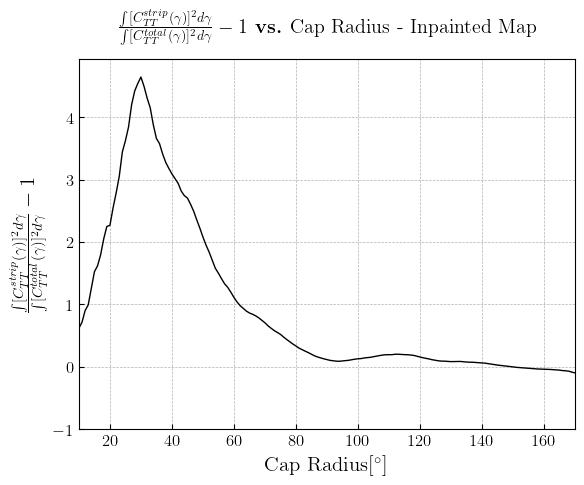

In [77]:
cmb_measure         = np.loadtxt('./output/T_64_inpainted_cap_corr_result.txt')
sampling_range      = np.loadtxt('./output/T_64_inpainted_cap_corr_measure_range.txt')

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.plot(sampling_range, cmb_measure,
            color='k', linewidth=1)
    ax.set_xlabel(r'Cap Radius[$^\circ$]',size=15)
    measure_text = r'$\frac {{ \int [C_{TT}^{{strip}}(\gamma)]^2 d\gamma }} {{ \int [C_{TT}^{{total}}(\gamma)]^2 d\gamma }} - 1$'
    ax.set_ylabel(measure_text ,size=15)
    ax.set_title(measure_text + r' \textbf{vs.} Cap Radius - Inpainted Map',
                 y=1.05)
    ax.set_xlim(xmin = 10, xmax = 170)
    ax.set_ylim(ymin = -1)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_corr_cap')
plt.show()

#### DCORR2

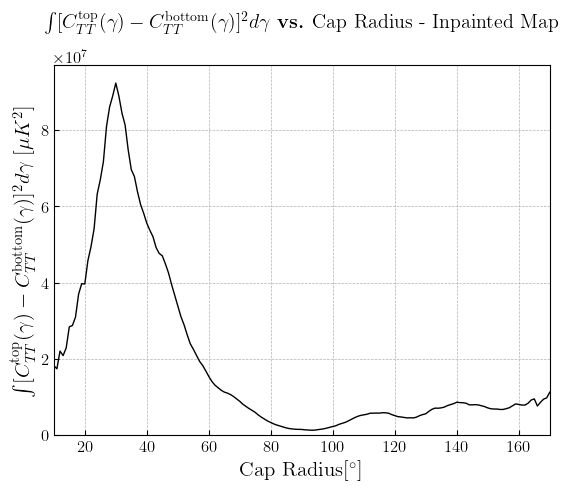

In [78]:
cmb_measure         = np.loadtxt('./output/T_64_inpainted_cap_dcorr2_result.txt')
sampling_range      = np.loadtxt('./output/T_64_inpainted_cap_dcorr2_measure_range.txt')

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.plot(sampling_range, cmb_measure,
            color='k', linewidth=1)
    ax.set_xlabel(r'Cap Radius[$^\circ$]',size=15)
    measure_text = r'$\int [C_{TT}^{{\mathrm{top}}}(\gamma) - C_{TT}^{{\mathrm{bottom}}}(\gamma)]^2 d\gamma$'
    ax.set_ylabel(measure_text  + r'$\; [\mu K^2]$', size=15)
    ax.set_title(measure_text + r' \textbf{vs.} Cap Radius - Inpainted Map',
                 y=1.08)
    ax.set_xlim(xmin = 10, xmax = 170)
    ax.set_ylim(ymin = -1)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_dcorr2_cap')
plt.show()